In [1]:
!git clone -b dev-rose https://github.com/Finweto/Projet-deep-learning-2022.git

Cloning into 'Projet-deep-learning-2022'...
remote: Enumerating objects: 1151, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1151 (delta 1), reused 5 (delta 1), pack-reused 1140
Receiving objects: 100% (1151/1151), 1.47 GiB | 17.69 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Checking out files: 100% (1003/1003), done.


In [2]:
# Imports
import itertools
import os
import pathlib
import random
import typing

import csv
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import sklearn.utils
import sklearn.metrics
import tensorflow as tf
import tensorflow.keras as keras

#                                                     MODELE 1 : Bords lisses ou dentés

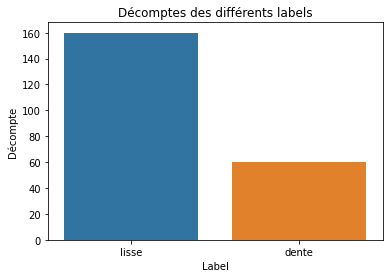

In [19]:
################################################ MODELE 1 : BORDS ##############################################

## CHOIX DE LA FEATURE :
label_names = ["dente", "lisse"] # Le 2ème élement du tableau sera celui converti en "1", le premier sera converti en 0
feature = "bord"



# Récupération des données préparées
data_train_labeled=pd.read_csv('Projet-deep-learning-2022/data_train_labeled.csv')



def get_images(filename):

  df=pd.read_csv(filename)
  images = []
  labels = []

  for i in range(len(df[feature])):
    path=df["img_path"][i]

    image=cv2.imread("Projet-deep-learning-2022/"+path)
    image=cv2.resize(image,(150,150))
    images.append(image)

    label=df[feature][i]
    ## ON DECIDE ICI DE LA CARACTERISTIQUE SUR LAQUELLE S'ENTRAINER
    # On convertit la réponse binaire en valeur numérique True/False où True = oui
    # OPTIMISABLE en utilisant des one_hot ?
    if df[feature][i]==label_names[1]:
      label = 1
    else:
      label = 0
    
    labels.append(label)

    # Mélange des tableaux
    images, labels = sklearn.utils.shuffle(images, labels)

  return images,labels



label_to_index = {l: i for i, l in enumerate(label_names)} # Pas utilisé pour l'instant, je le laisse au cas où
images, labels= get_images("Projet-deep-learning-2022/data_train_labeled.csv")

seaborn.countplot(x=data_train_labeled[feature])
plt.title("Décomptes des différents labels")
plt.ylabel("Décompte")
plt.xlabel("Label")
plt.show()

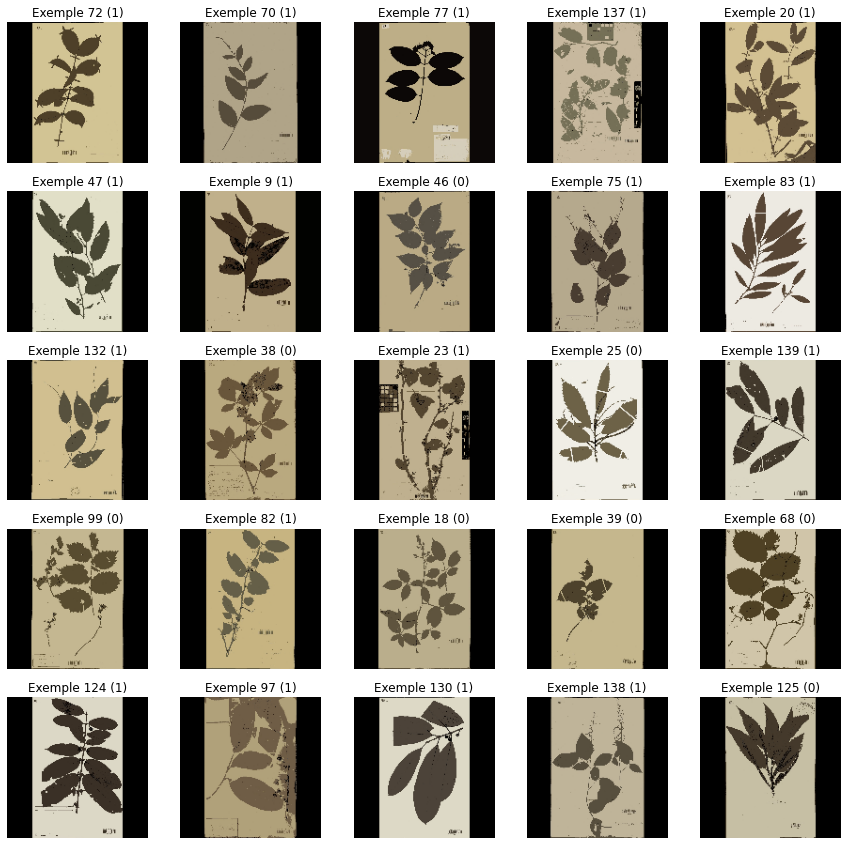

In [4]:
## Affichage des données originales

f, ax = plt.subplots(5, 5, figsize=(15, 15))
random_indexes = np.random.choice(images[0].shape[0], size=(5, 5), replace=False)

for i in range(5):
  for j in range(5):
    img_index = random_indexes[i, j]
    image = images[img_index]
    label = labels[img_index]

    ax[i, j].imshow(image)
    ax[i, j].set_title(f"Exemple {img_index} ({label})")
    ax[i, j].axis('off')

In [12]:
################################################ CONSTRUCTION DU MODELE ########################################

## Version COMPLEXE (Apprentissage plus long)

conv2d_params = dict(kernel_size=(3,3), activation="relu", kernel_initializer="orthogonal", padding="same")
dense_params = dict(activation="relu", kernel_initializer="orthogonal")


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(200, input_shape=(150, 150, 3), **conv2d_params))
model.add(keras.layers.MaxPool2D(2, 2, padding="same"))
model.add(keras.layers.Conv2D(200, **conv2d_params))
model.add(keras.layers.MaxPool2D(2, 2, padding="same"))
model.add(keras.layers.Conv2D(200, **conv2d_params))
model.add(keras.layers.MaxPool2D(2, 2, padding="same"))
model.add(keras.layers.Conv2D(200, **conv2d_params))
model.add(keras.layers.MaxPool2D(2, 2, padding="same"))
model.add(keras.layers.Conv2D(200, **conv2d_params))
model.add(keras.layers.MaxPool2D(2, 2, padding="same"))
model.add(keras.layers.Conv2D(200, **conv2d_params))
model.add(keras.layers.MaxPool2D(2, 2, padding="same"))
model.add(keras.layers.Conv2D(200, **conv2d_params))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(200, **dense_params))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(100, **dense_params))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(50, **dense_params))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(11,
                             activation="softmax",
                             kernel_initializer="orthogonal"))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 200)     5600      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 200)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 200)       360200    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 38, 38, 200)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 38, 38, 200)       360200    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 19, 19, 200)     

In [21]:
## Version SIMPLE

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(10,
                              kernel_size=(3, 3),
                              activation="relu",
                              input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPool2D(3,3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(11, activation="softmax"))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 49, 49, 10)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 24010)             0         
                                                                 
 dense_9 (Dense)             (None, 11)                264121    
                                                                 
Total params: 264,401
Trainable params: 264,401
Non-trainable params: 0
_________________________________________________________________


Epoch 1/40
2/2 [==============================] - 1s 172ms/step - loss: 51.0034 - accuracy: 0.0844 - val_loss: 51.5745 - val_accuracy: 0.2424
Epoch 2/40
2/2 [==============================] - 0s 33ms/step - loss: 37.6769 - accuracy: 0.2792 - val_loss: 43.0976 - val_accuracy: 0.3636
Epoch 3/40
2/2 [==============================] - 0s 31ms/step - loss: 28.5329 - accuracy: 0.4610 - val_loss: 38.9362 - val_accuracy: 0.4848
Epoch 4/40
2/2 [==============================] - 0s 37ms/step - loss: 23.5054 - accuracy: 0.6429 - val_loss: 36.4441 - val_accuracy: 0.5758
Epoch 5/40
2/2 [==============================] - 0s 33ms/step - loss: 21.2399 - accuracy: 0.7143 - val_loss: 34.0833 - val_accuracy: 0.5758
Epoch 6/40
2/2 [==============================] - 0s 30ms/step - loss: 19.4113 - accuracy: 0.7468 - val_loss: 31.3010 - val_accuracy: 0.5909
Epoch 7/40
2/2 [==============================] - 0s 31ms/step - loss: 17.7008 - accuracy: 0.7597 - val_loss: 28.1581 - val_accuracy: 0.6061
Epoch 8/40
2

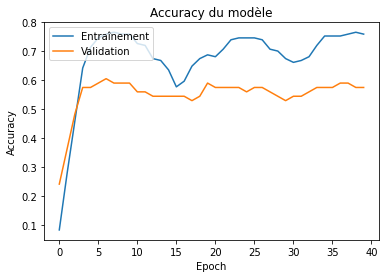

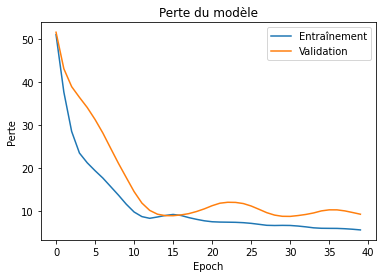

In [22]:
################################################ APPRENTISSAGE ########################################

# Apprentissage du modèle
images=np.array(images)
labels=np.array(labels)


training = model.fit(images, labels, epochs=40, batch_size=128, validation_split=0.30)


# Visualisation des métriques d'entrainement
def plot_metrics(history) -> None:
  plt.plot(training.history["accuracy"])
  plt.plot(training.history["val_accuracy"])
  plt.title("Accuracy du modèle")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(["Entraînement", "Validation"], loc="upper left")
  plt.show()

  plt.plot(training.history["loss"])
  plt.plot(training.history["val_loss"])
  plt.title("Perte du modèle")
  plt.ylabel("Perte")
  plt.xlabel("Epoch")
  plt.legend(["Entraînement", "Validation"], loc="upper right")
  plt.show()


plot_metrics(training.history)

In [23]:
## Evaluation du modèle
test_images, test_labels = get_images("Projet-deep-learning-2022/data_test_labeled.csv")

In [24]:
model.evaluate(np.array(test_images), np.array(test_labels), verbose=1)

4/4 [==============================] - 0s 5ms/step - loss: 6.8769 - accuracy: 0.6545


[6.876906871795654, 0.6545454263687134]

4/4 [==============================] - 0s 4ms/step


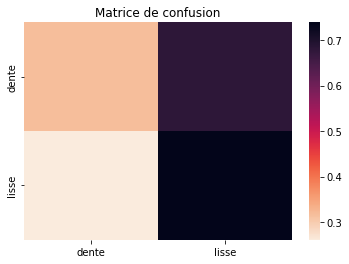

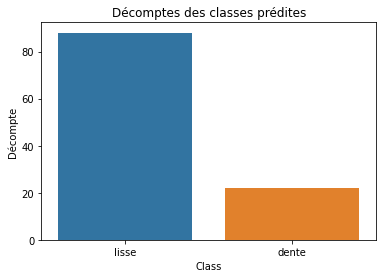

In [25]:
## Analyse des erreurs

def analyze_preds(preds, labels):
  confusion_matrix = sklearn.metrics.confusion_matrix(preds,
                                                      labels,
                                                      normalize="true")
  seaborn.heatmap(confusion_matrix,
                  cmap="rocket_r",
                  xticklabels=label_names,
                  yticklabels=label_names)
  plt.title("Matrice de confusion")
  plt.show()

  seaborn.countplot(x=list(map(lambda x: label_names[x], preds)))
  plt.title("Décomptes des classes prédites")
  plt.ylabel("Décompte")
  plt.xlabel("Class")
  plt.show()


test_pred = np.argmax(model.predict(np.array(test_images)), axis=-1)
analyze_preds(test_pred, test_labels)

Prédiction : 1, classe réelle : 0


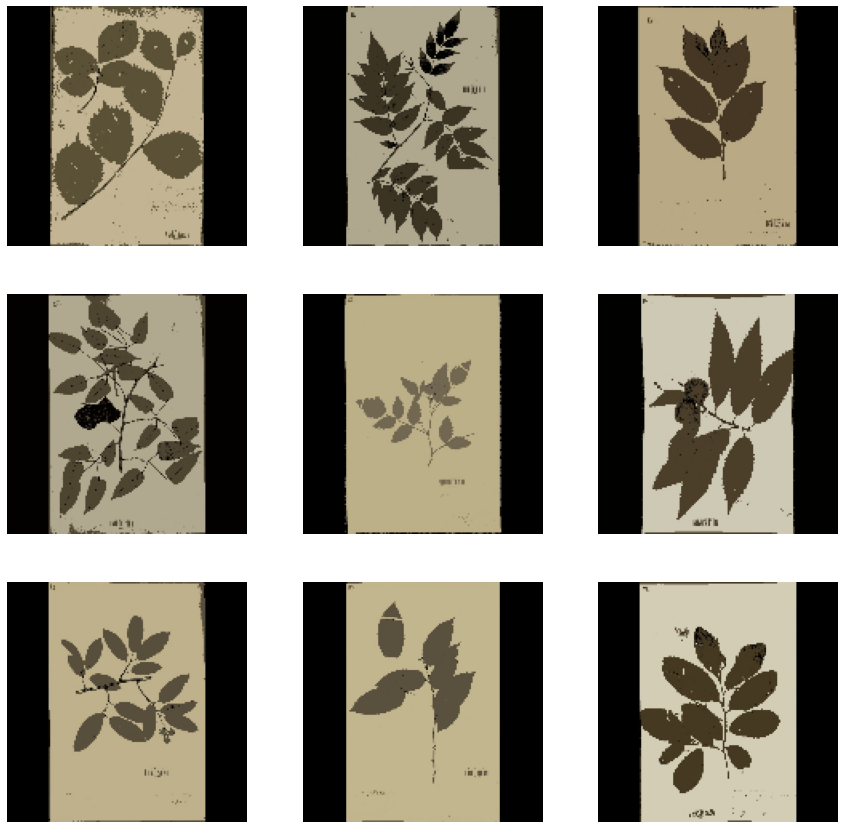

Valeurs prédites par notre modèle :
[1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1
 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]

Valeurs réelles :
[0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1]


In [26]:
def plot_mistakes(predicted_class: str, true_class: str) -> None:
  print(f"Prédiction : {predicted_class}, classe réelle : {true_class}")
  mistakes=[]

  for index, image in enumerate(test_images):
    if (test_pred[index] == predicted_class) and (test_labels[index] == true_class):
      mistakes.append(image)
  

  random_indexes = np.random.choice(len(mistakes),
                                       size=min(len(mistakes), 9),
                                       replace=False)
  grid_indexes = itertools.product(range(3), repeat=2)

  _, ax = plt.subplots(3, 3, figsize=(15, 15))
  for img_index, (i, j) in zip(random_indexes, grid_indexes):
    ax[i, j].imshow(mistakes[img_index])
    ax[i, j].axis("off")
  plt.show()
  

# On plot quelques unes des images prédites lisses (=1) alors qu'elles sont dentées (=0)
plot_mistakes(1, 0)
print("Valeurs prédites par notre modèle :")
print(test_pred)
print("\nValeurs réelles :")
print(test_labels)

#                                                      MODELE 2 : Phyllotaxie